In [2]:
install.packages("netdiffuseR")


package 'netdiffuseR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\madhu.kolli\AppData\Local\Temp\RtmpOiVA2W\downloaded_packages


In [3]:
library("igraph")
library(R.utils)
library(igraph)
library(ggplot2)
set.seed(0)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.21.0 (2016-10-30) successfully loaded. See ?R.oo for help.

Attaching package: 'R.oo'

The following object is masked from 'package:igraph':

    hierarchy

The following objects are masked from 'package:methods':

    getClasses, getMethods

The following objects are masked from 'package:base':

    attach, detach, gc, load, save

R.utils v2.5.0 (2016-11-07) successfully loaded. See ?R.utils for help.

Attaching package: 'R.utils'

The following object is masked from 'package:utils':

    timestamp

The following objects are masked from 'package:base':

    cat, commandArgs, getOption, inherits, isOpen, parse, warnings



In [104]:
#path to files
dir = "C:/Users/madhu.kolli/Desktop/ECE232/Project2/gplus/"
dir1 = "C:/Users/madhu.kolli/Desktop/ECE232/Project2/facebook_combined.txt"

In [123]:
#question 16 
# read facebook file
g <- read_graph(file='C:/Users/madhu.kolli/Desktop/ECE232/Project2/facebook_combined.txt',format='edgelist',directed=F)
V(g)$name <- V(g)

nr = unlist(ego(g, order=1, nodes = which(V(g)$name==415), mode = "all"))
pnw = induced_subgraph(g, vids = as.character(nr))
count = V(pnw)$name[degree(pnw)==24]

count <- as.table(count)
count
writeLines(paste('User Count', length(count)))

  A   B   C   D   E   F   G   H   I   J   K 
497 579 601 616 619 628 644 659 660 662 663 

User Count 11


In [155]:
#q17
avgfn = function(graph, from, to, algorithm)
{    
    if (algorithm == c("adamicadar"))
         return(similarity(graph, vids = c(as.character(from)), method = c("invlogweighted"))[which(to == V(graph)$name)])     
    else if (algorithm == c("jaccard"))
         return(similarity(graph, vids = c(from, to), method = c(algorithm))[1,2])     
    else
        return(length(intersect(neighbors(graph, as.character(from)), neighbors(graph, to))))    
    
}

funq17 = function(target, personal_net, algorithm, num_iterations = 10){
    
    node_accuracies <- c()
    for(node in target){

            accuracy <- c()
            for(i in c(1:num_iterations)){

                node_neighbors = neighbors(personal_net, as.character(node))

                deleted_friends <- sample(node_neighbors, length(node_neighbors)*0.25)
                t <- length(deleted_friends) # t is the number of deleted i.e to be recommended friends
                delete_seq <- paste(node, "|", deleted_friends$name, sep = "")
                new_graph <- delete_edges(personal_net, c(delete_seq))
                node_neighbors = neighbors(new_graph, as.character(node))
                node_not_neighbors = difference(V(new_graph), node_neighbors)

                score <- c()
                for(to in node_not_neighbors$name)
                    score <- c(score, avgfn(new_graph, node, as.character(to), algorithm))
                recommended_friends <- node_not_neighbors[sort(score, decreasing = TRUE, index.return=TRUE)$ix[1:t]]        
                correct_recommendations <- length(intersect(recommended_friends, deleted_friends))
                accuracy <- c(accuracy, correct_recommendations/t)
            }

            printf(paste("\nNode - ", node , " Mean accuracy over 10 trials - ", mean(accuracy)))
            node_accuracies <- c(node_accuracies, mean(accuracy))
    }
    
    return(mean(node_accuracies))
}

acc <- funq17(target, personal_net, "common_neighbors")
printf(paste("\nAccuracy of Common Neighbors ", acc))
acc <- funq17(target, personal_net, "jaccard")
printf(paste("\nAccuracy of Jaccard ", acc))
acc <- funq17(target, personal_net, "adamicadar")
printf(paste("\nAccuracy of Adamic Adar ", acc))

df2 <- data.frame(target)
head(df2)


Node -  497  Mean accuracy over 10 trials -  0.316666666666667
Node -  579  Mean accuracy over 10 trials -  0.833333333333333
Node -  601  Mean accuracy over 10 trials -  0.8
Node -  616  Mean accuracy over 10 trials -  0.7
Node -  619  Mean accuracy over 10 trials -  0.383333333333333
Node -  628  Mean accuracy over 10 trials -  0.833333333333333
Node -  644  Mean accuracy over 10 trials -  0.816666666666667
Node -  659  Mean accuracy over 10 trials -  0.833333333333333
Node -  660  Mean accuracy over 10 trials -  0.833333333333333
Node -  662  Mean accuracy over 10 trials -  0.783333333333333
Node -  663  Mean accuracy over 10 trials -  0.833333333333333
Accuracy of Common Neighbors  0.724242424242424
Node -  497  Mean accuracy over 10 trials -  0.1
Node -  579  Mean accuracy over 10 trials -  0.833333333333333
Node -  601  Mean accuracy over 10 trials -  0.8
Node -  616  Mean accuracy over 10 trials -  0.666666666666667
Node -  619  Mean accuracy over 10 trials -  0.533333333333333

target
1 497   
2 579   
3 601   
4 616   
5 619   
6 628

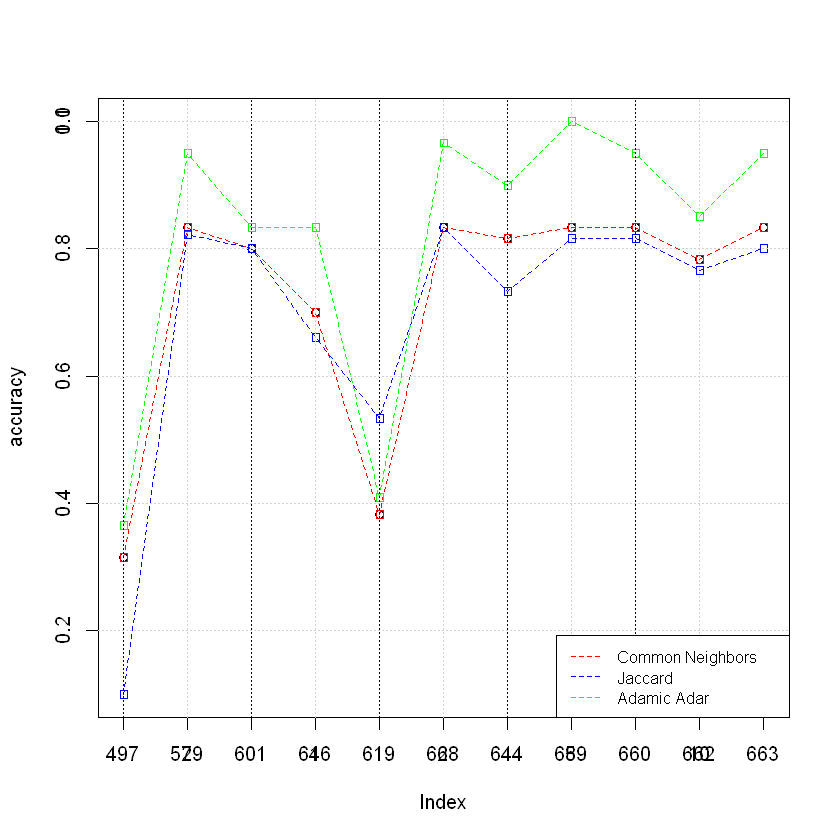

In [259]:
nodes <- c(497,579,601,616,619,628,644,659,660,662,663)
accuracy <- c(0.316,0.833,0.8,0.7,0.383,0.833,0.816,0.833,0.833,0.783,0.833)
accuracy1 <- c(0.1,0.822,0.8,0.66,0.533,0.833,0.733,0.816,0.816,0.766,0.8)
accuracy2 <- c(0.366,0.95,0.833,0.833,0.41,0.966,0.9,1,0.95,0.85,0.95)
plot(accuracy,ylim=c(0.1,1.0),panel.first=grid())
# Make x axis using  labels
axis(1, at=1:11, lab=c("497","579","601","616","619","628","644","659","660","662","663"))
axis(2, at=1:11, lab=c("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0","1.1"))
# Graph trucks with red dashed line and square points
box()
lines(accuracy, type="o", pch=22, lty=2, col="red")
lines(accuracy1, type="o", pch=22, lty=2, col="blue")
lines(accuracy2, type="o", pch=22, lty=2, col="green")
abline(h=1:10, v=1:10, col="black", lty=3)
grid(NULL,NULL)

legend("bottomright", legend=c("Common Neighbors", "Jaccard","Adamic Adar"),
       col=c("red", "blue","green"), lty=2, cex=0.8)

In [4]:
# Question 18 - Find the count of circles 
# Declare directory first

count_nodes <- c()
for (files in list.files(path=dir,pattern=".circles"))
     if(length(readLines(paste(dir, files, sep = ""))) > 2)
         count_nodes <- c(count_nodes,sub(".circles","",files))
printf(paste("count of user with more than 2 circles", length(count_nodes)))

count of user with more than 2 circles 57

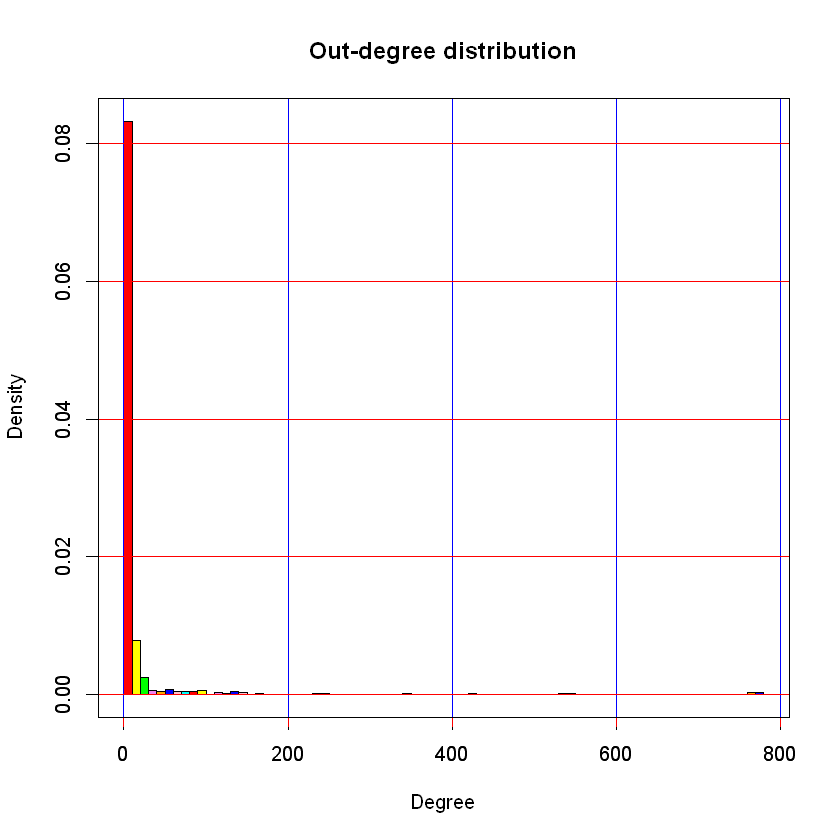

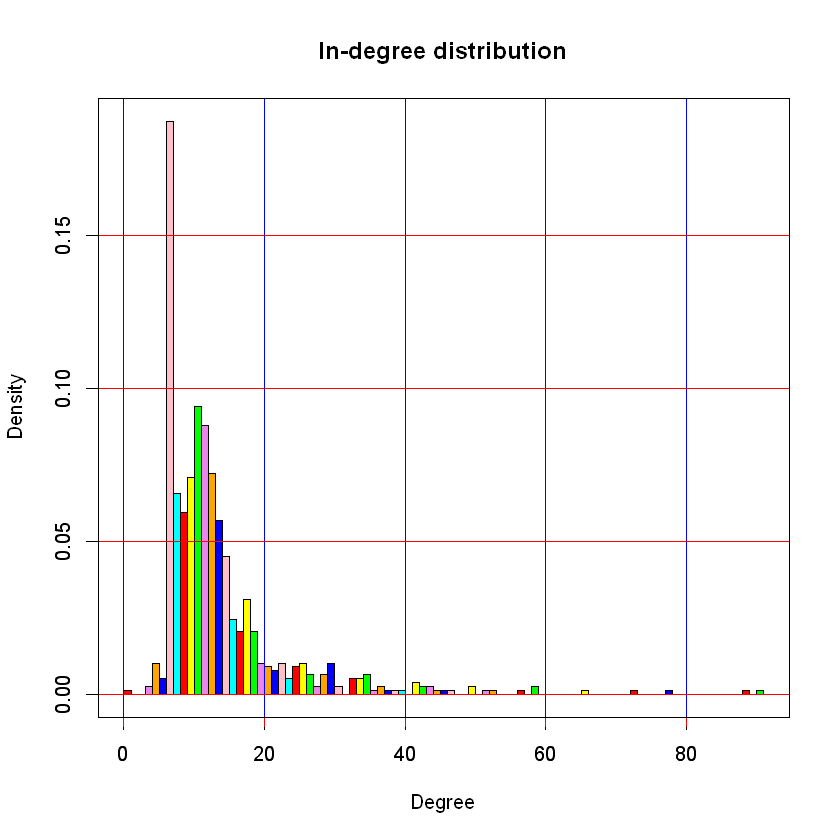

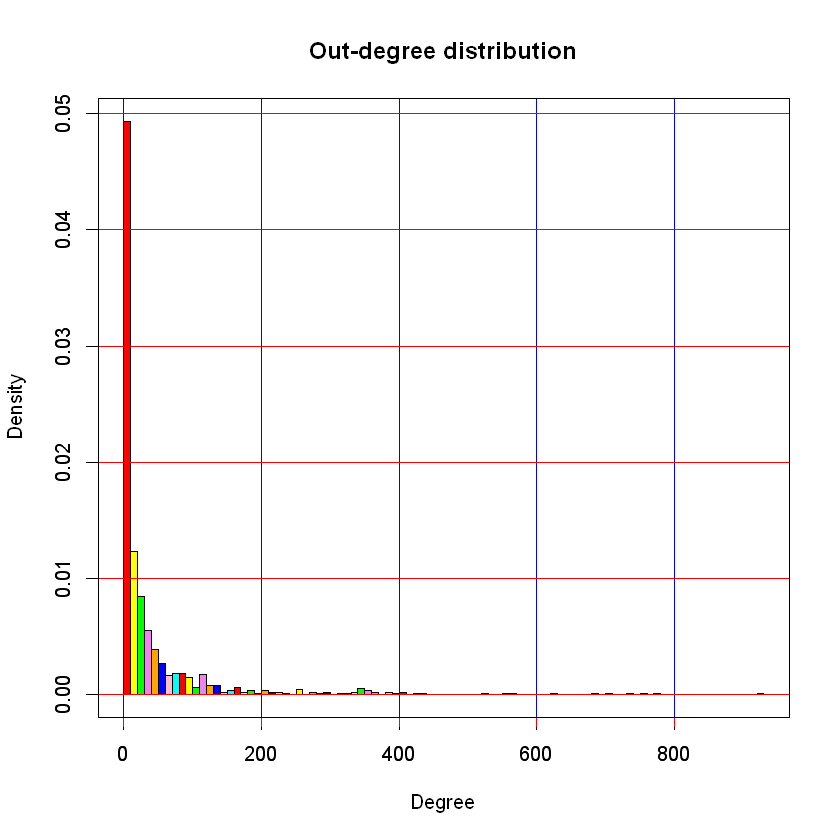

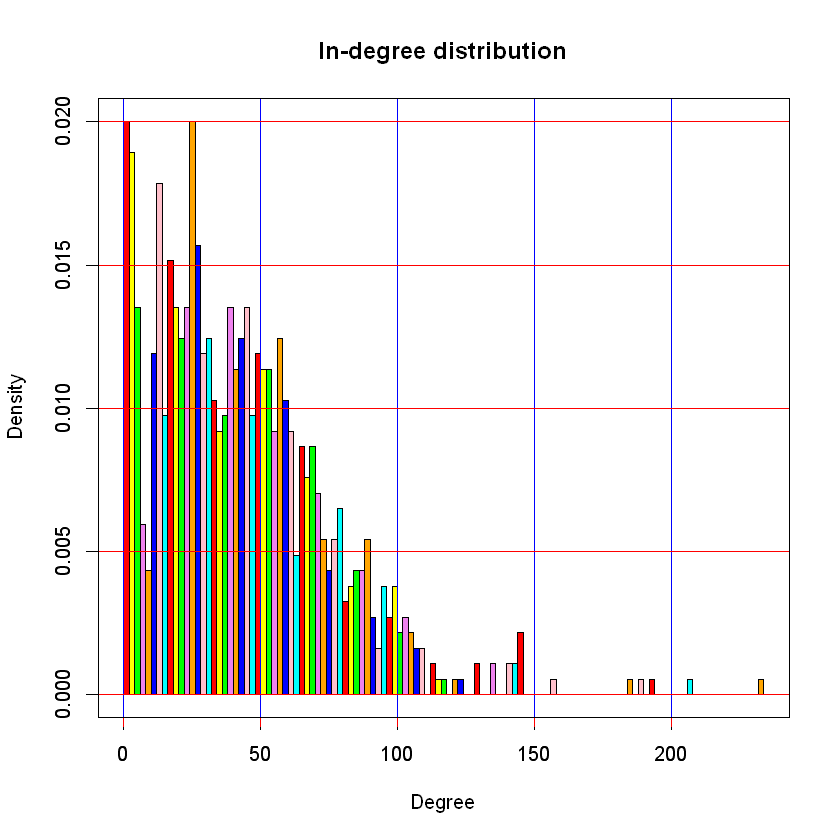

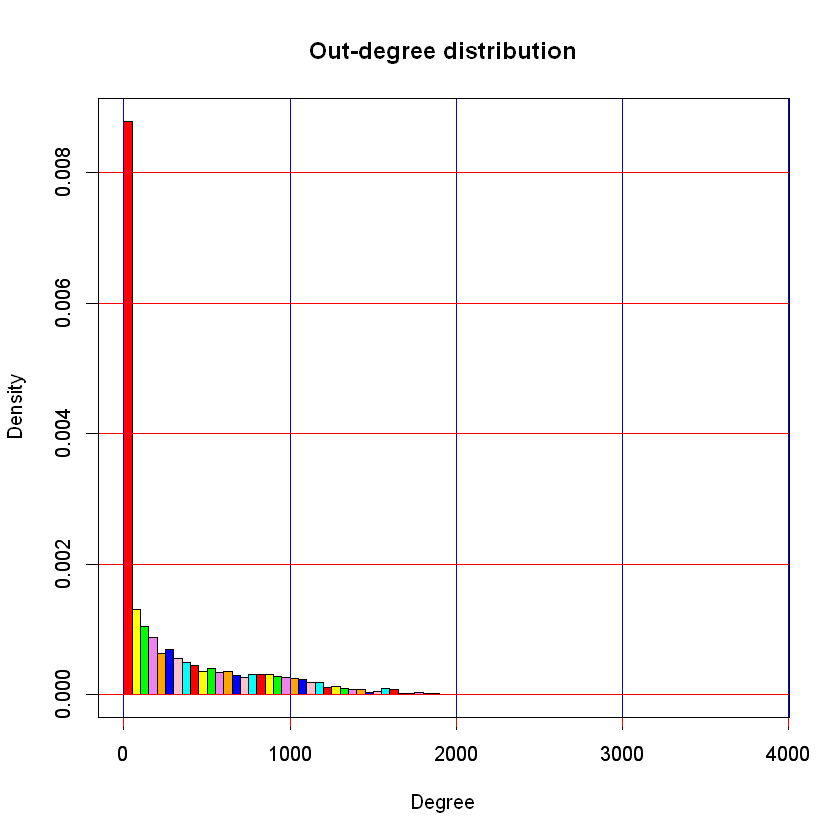

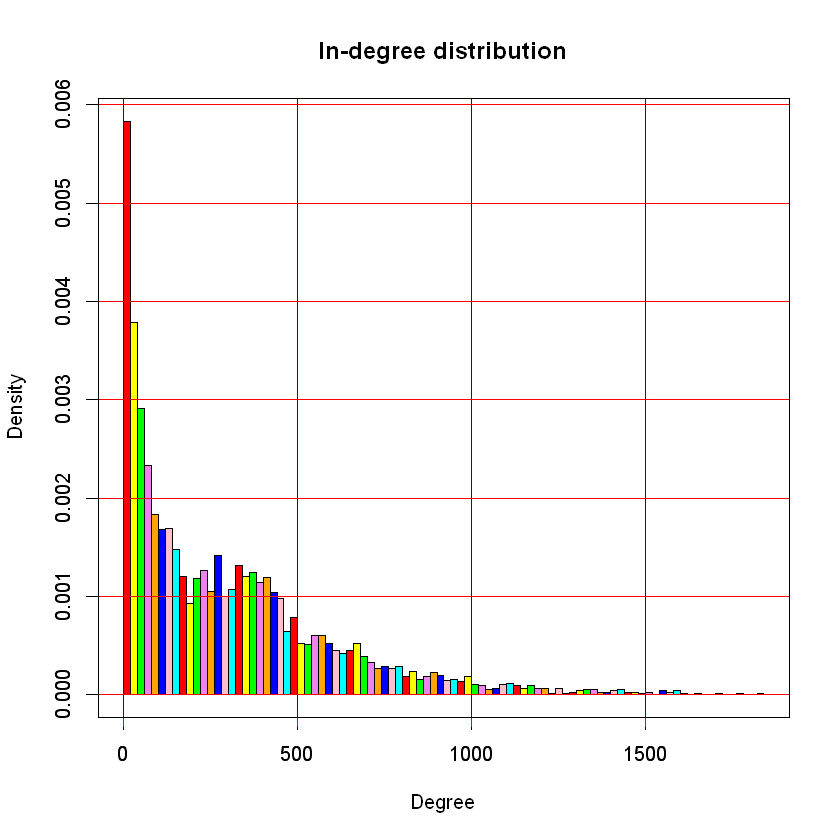

In [5]:
# Question 19 the below code plots the in/out degree distribution
qids <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan") 
qplot = function(itin, plot = TRUE)
{
  path <- paste("C:/Users/madhu.kolli/Desktop/ECE232/Project2/gplus/" , itin  , ".edges" , sep="")
  nw <- read.graph(path , format = "ncol" , directed=TRUE)  
  nw <- add.vertices(nw, nv = 1, name = itin)
  ego_node_index <- which(V(nw)$name == itin) 
  corners <- c()
    
  for (vertex in 1:vcount(nw))
      if (vertex != ego_node_index)
        corners <- c(corners, c(ego_node_index, vertex))
  nw <- add_edges(nw, corners)
  
  if(plot)
#plot out degree
    oneout <- degree(nw, v = V(nw), mode = c("out"))
    hist(oneout, breaks = 100,prob = TRUE
         ,main = 'Out-degree distribution', xlab = "Degree",
         col=colors)
    # Adjust the plot for grid and bacground
    axis(1, tck=1, col.ticks="blue")
    axis(1, tck=-0.015, col.ticks=colors)
    axis(2, tck=1, col.ticks="red", lwd.ticks="1")
    axis(2, tck=-0.015)
    box()    
#plot in degree    
       
    twoin <- degree(nw, v = V(nw), mode = c("in"))
    hist(twoin, breaks = 100,prob = TRUE,
         main = 'In-degree distribution', xlab = "Degree",
        col=colors)
    # Adjust the plot for grid and bacground
    axis(1, tck=1, col.ticks="blue")
    axis(1, tck=-0.015, col.ticks=colors)
    axis(2, tck=1, col.ticks="red", lwd.ticks="1")
    axis(2, tck=-0.015)
    box()
    
  return(nw)
  
}

pwn = function(itin, plot = TRUE)
{
    nw <- qplot(itin, plot)     
}

pwn(qids[1])
pwn(qids[2])
pwn(qids[3])
# Question 19 the below code plots the in/out degree distribution

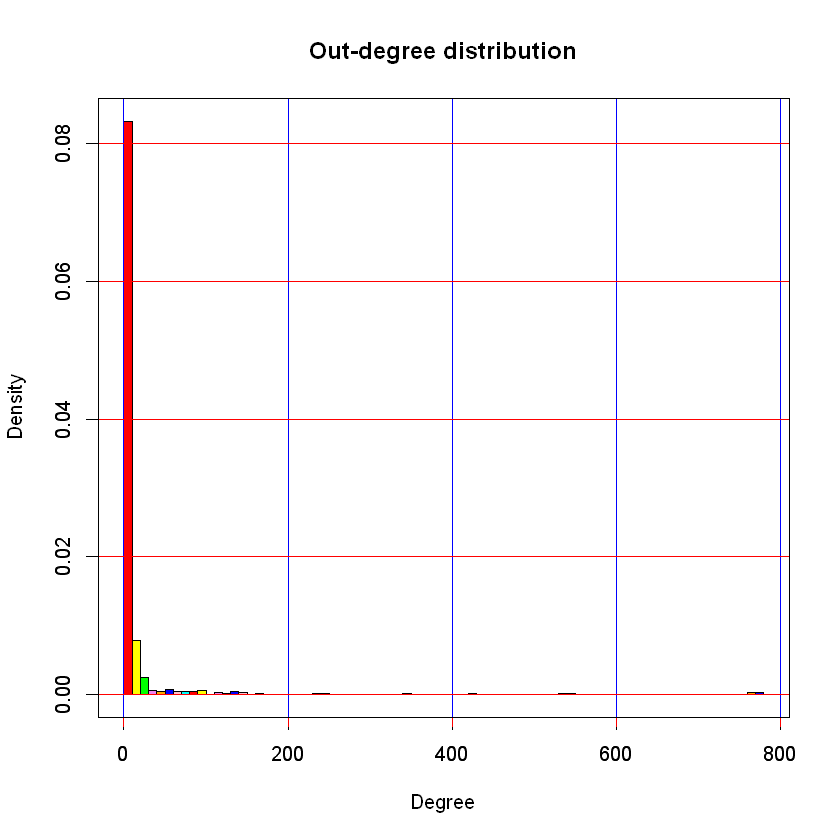

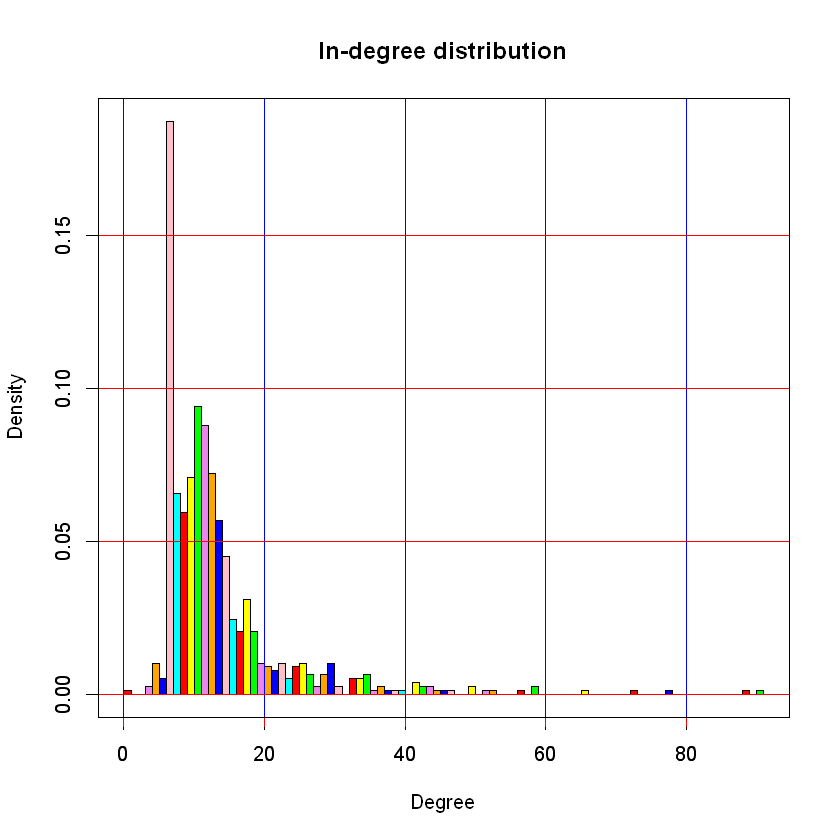


Modularity of the community =  0.252765387296677

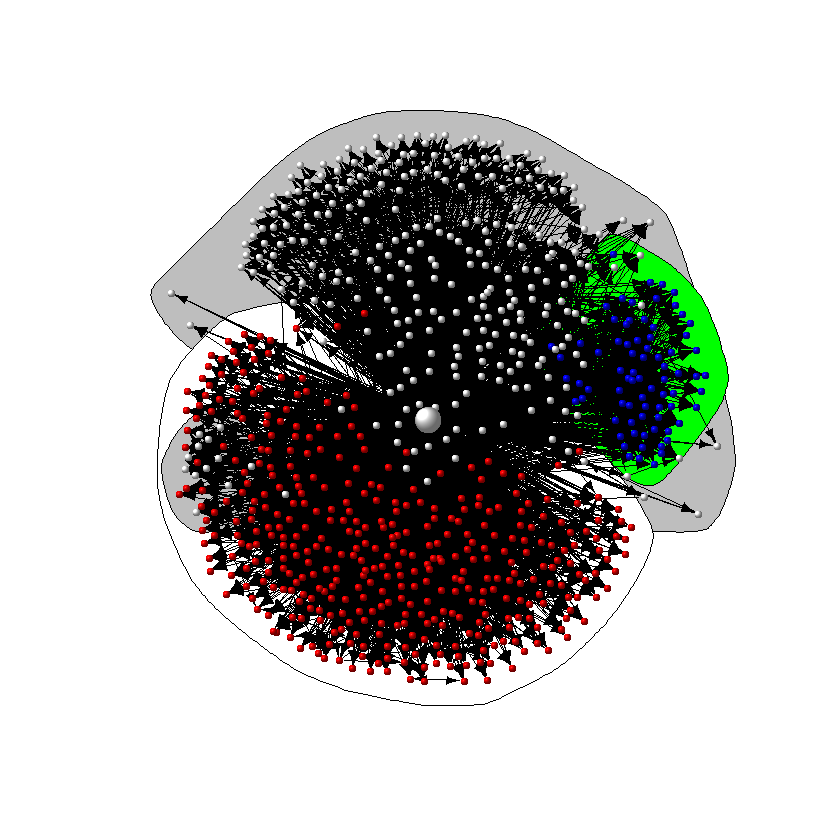

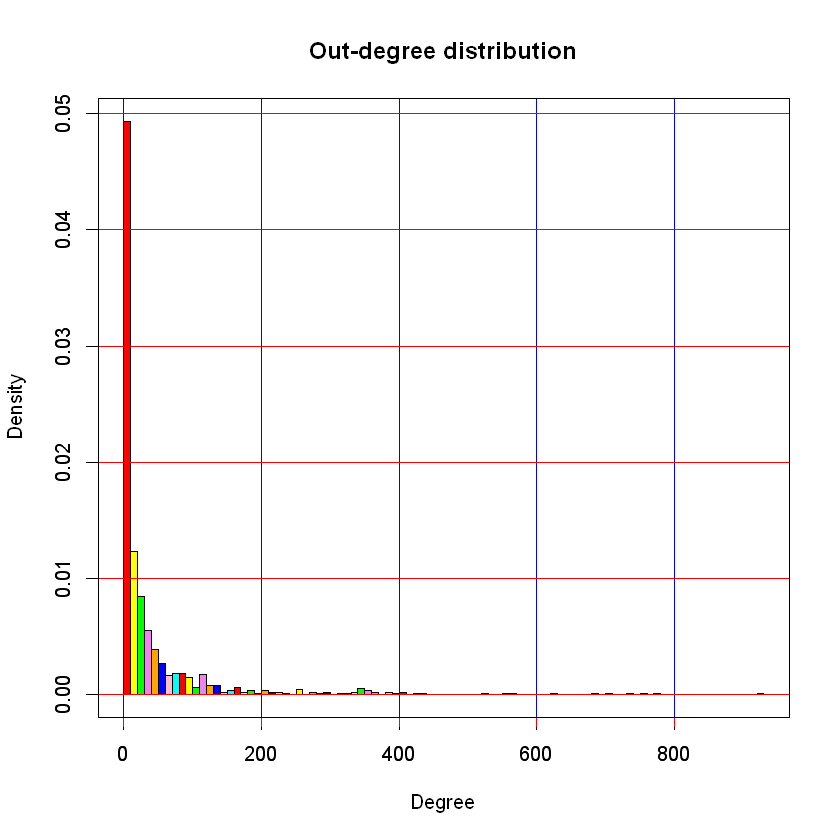

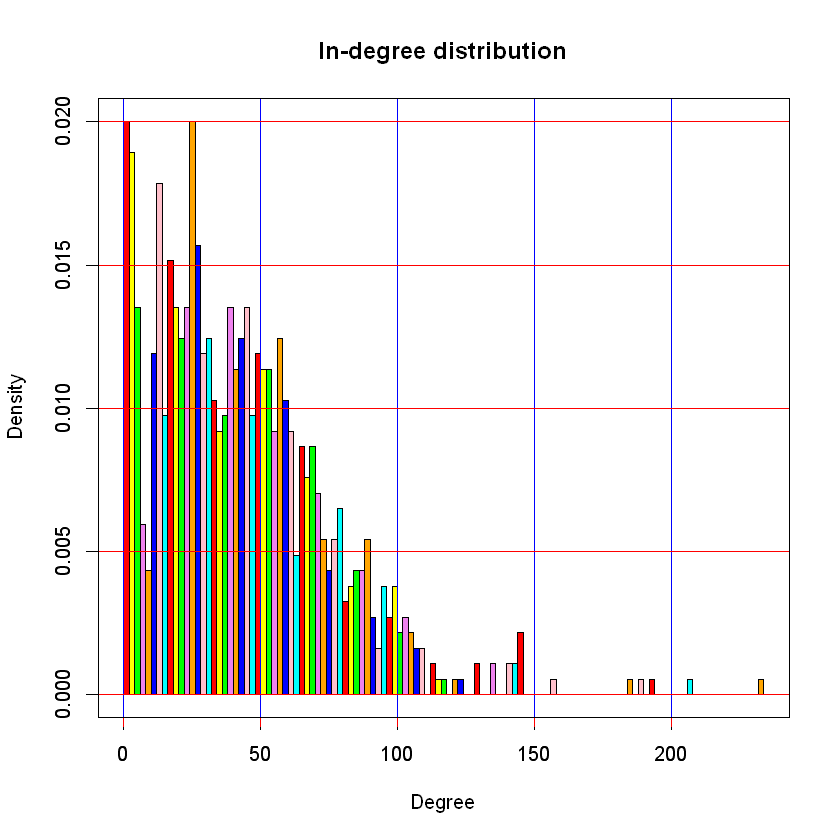


Modularity of the community =  0.319472551345825

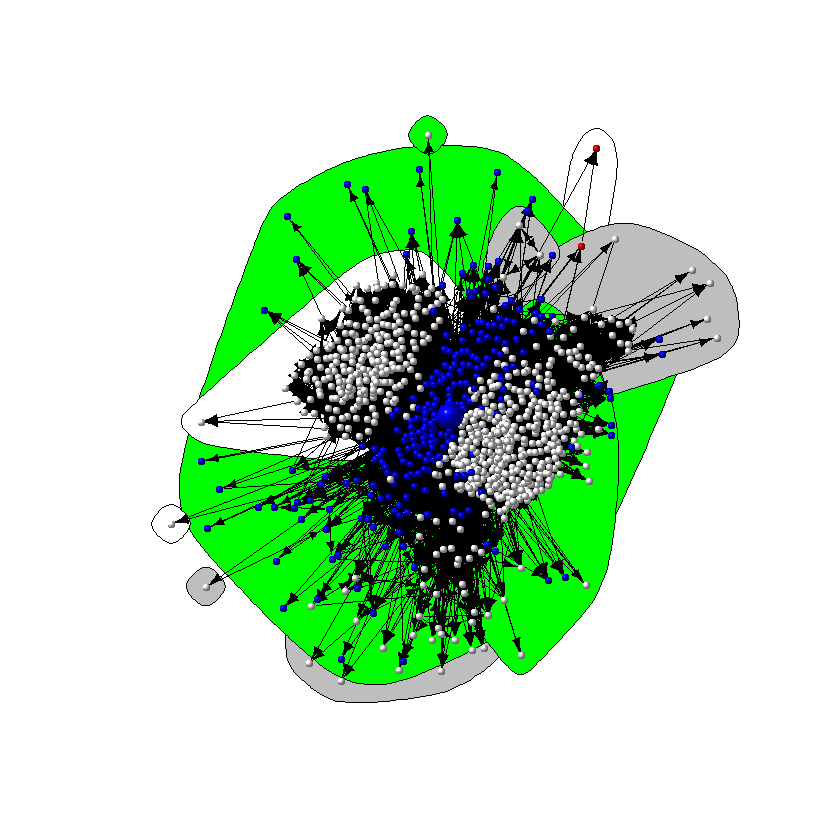

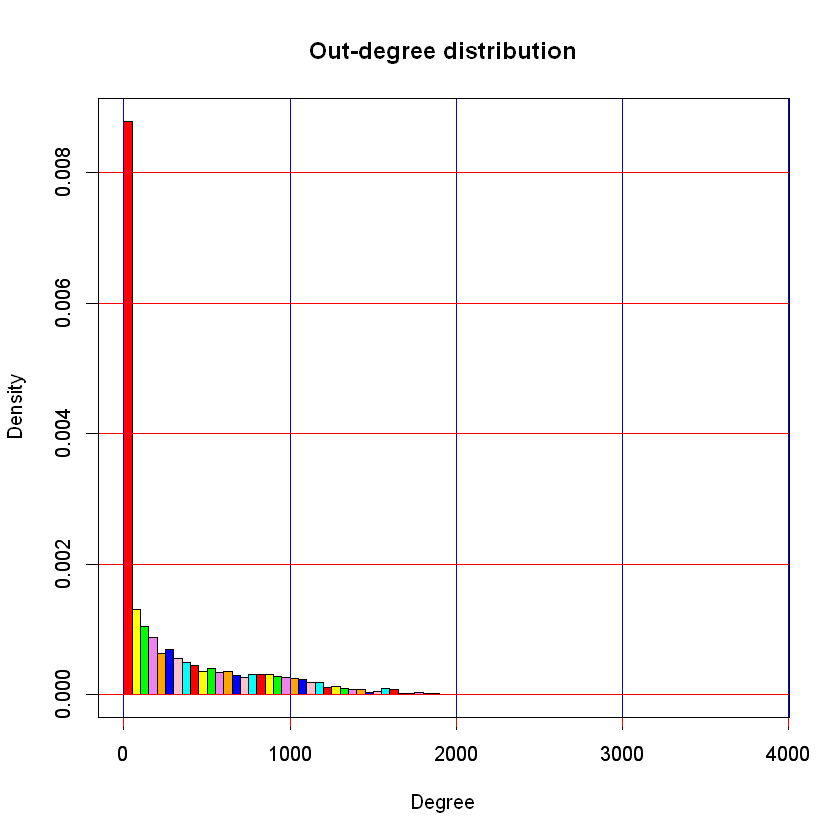

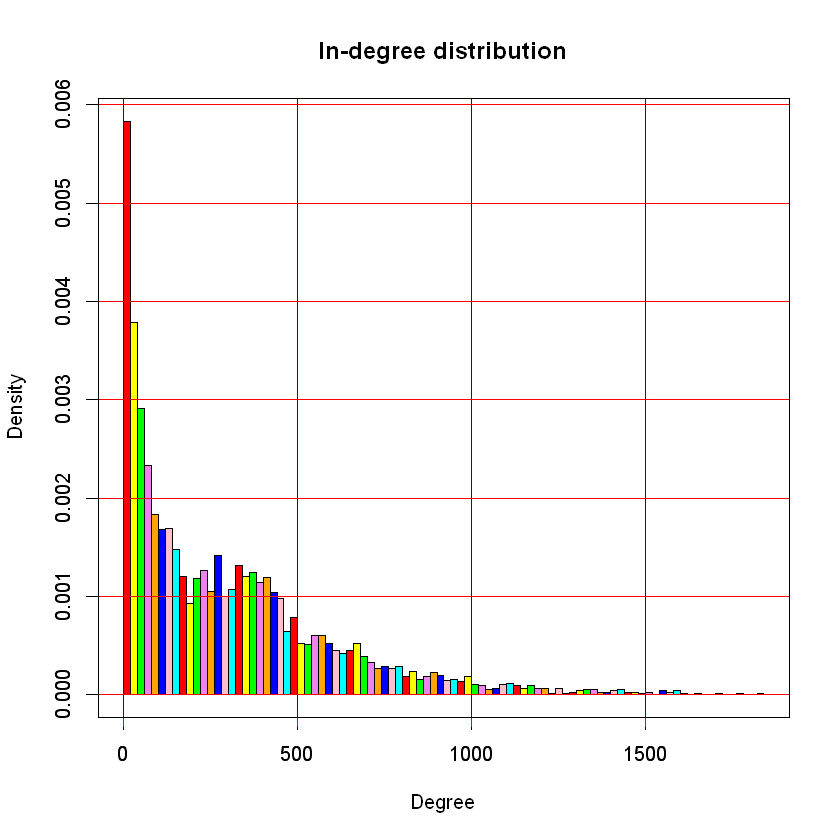


Modularity of the community =  0.191090270876884

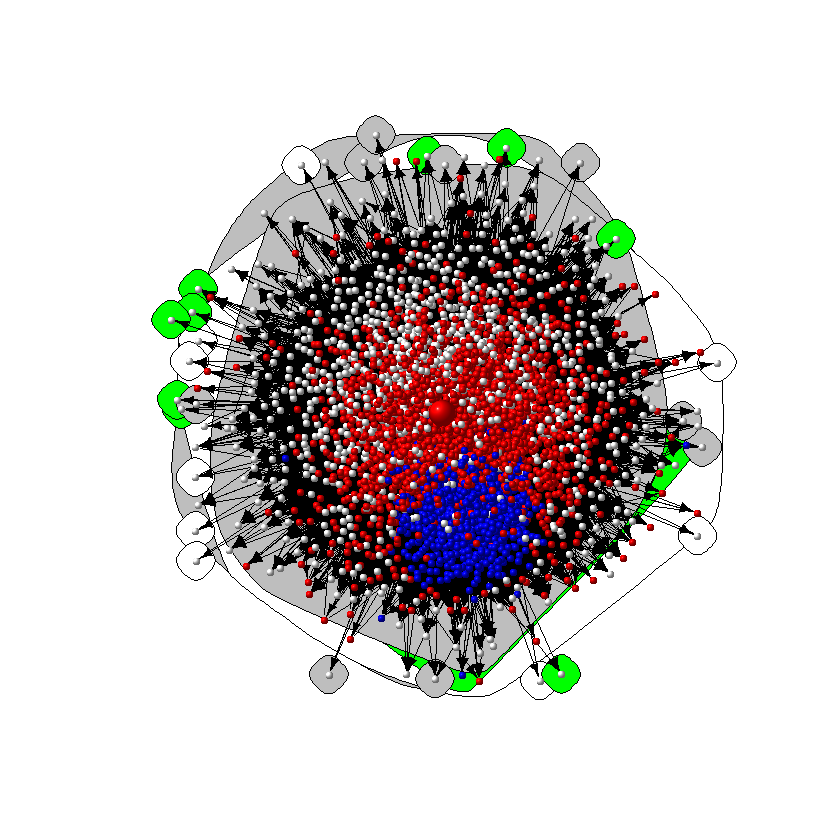

In [62]:
#https://www.rdocumentation.org/packages/igraph/versions/0.5.1/topics/walktrap.community
q20ids<- c("109327480479767108490", "115625564993990145546", "101373961279443806744")
pwn(q20ids[1])
pwn(q20ids[2])
pwn(q20ids[3])
set.seed(723) # keep the same arrangement each time
qplot2 = function(commnw, ego_node_id, plot = TRUE){
    
    commnw <- simplify(commnw, remove.multiple = F, remove.loops = T,edge.attr.comb=list(Weight="sum","ignore"))
    struc = walktrap.community(commnw, steps = 4, merges = TRUE, modularity = FALSE)
    
    #struc = walktrap.community(commnw)
    
    node_size = rep(3, vcount(commnw))
    
    ego_node_index <- which(V(commnw)$name == ego_node_id) 
    
    node_size[ego_node_index] = 10
    new_cols <- c("white", "red", "blue")[membership(struc)]
    pal2 <- c(rainbow(5, alpha=.5)[membership(struc)])
    
    if(plot){
          layout = layout.auto
      
        
        #plot(struc, commnw, vertex.size = node_size, layout=layout.fruchterman.reingold,vertex.shape="square",
        #     vertex.label=NA, edge.lty = "dashed", edge.arrow.mode = 0.05, mark.border = "red",
        #     main = "Walk-trap community graph with edges",vertex.size=5,asp=9/16,lwd = 2)           
        plot(struc, commnw, vertex.size = node_size,vertex.label='',col=new_cols,mark.border="black",
             mark.col=c("gray", "white", "green"),vertex.size=5, edge.arrow.size=.5,vertex.shape="sphere",
             vertex.color="green",vertex.label.dist=1.5,edge.color="black")
             
    }
    
   
    printf(paste("\nModularity of the community = ", modularity(struc)))
    return(struc)

    
}
pwn= function(node_id, plot = TRUE)
{

    commnw <- qplot(node_id, plot)
    struc <- qplot2(commnw, node_id, plot)
   
   
}



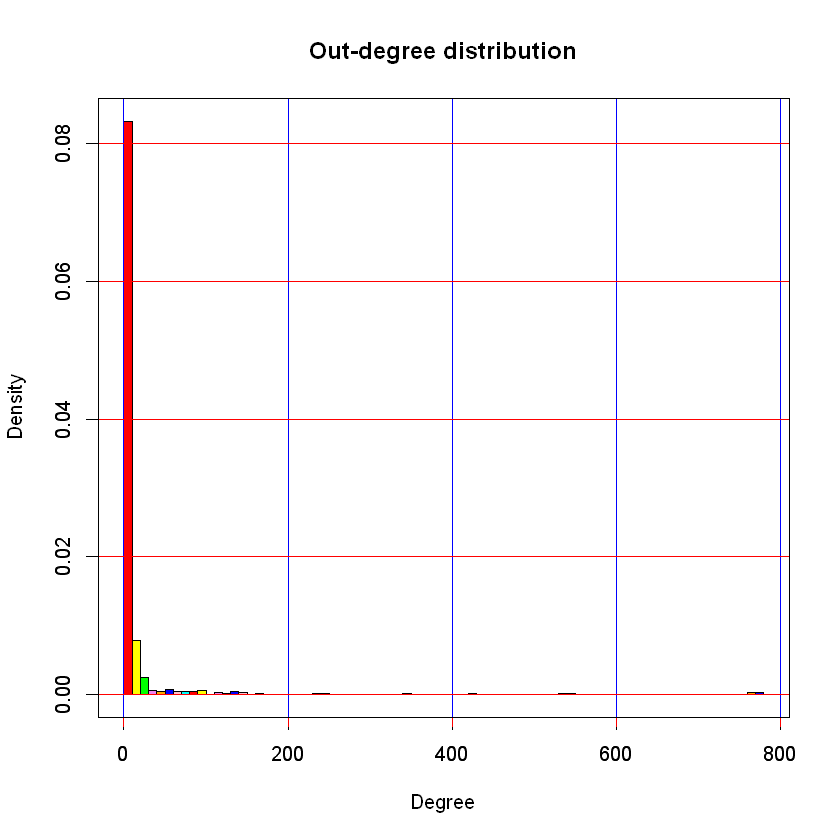

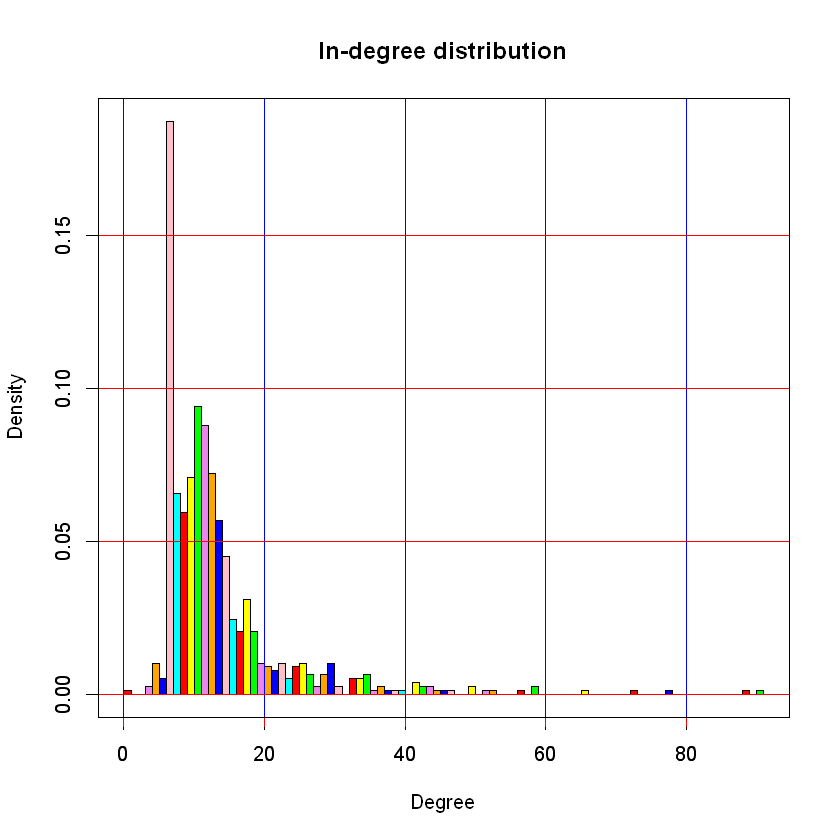


Modularity of the community =  0.252765387296677[1] 1.433246
[1] "H(C) 1.05077934757594"
[1] "H(K) 1.00520818089008"
[1] "H(C|K) 0.155636061763332"
[1] "H(K|C) 0.673616224340775"

 Score for Homogeneity =  0.851885115440867
 Score for Completeness =  0.329873913536689

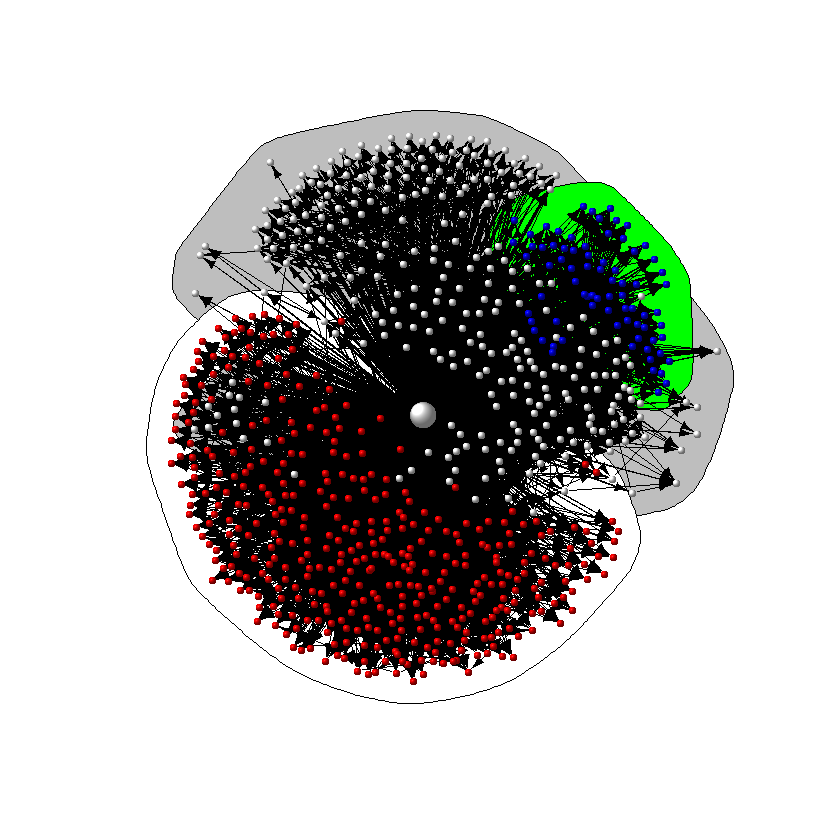

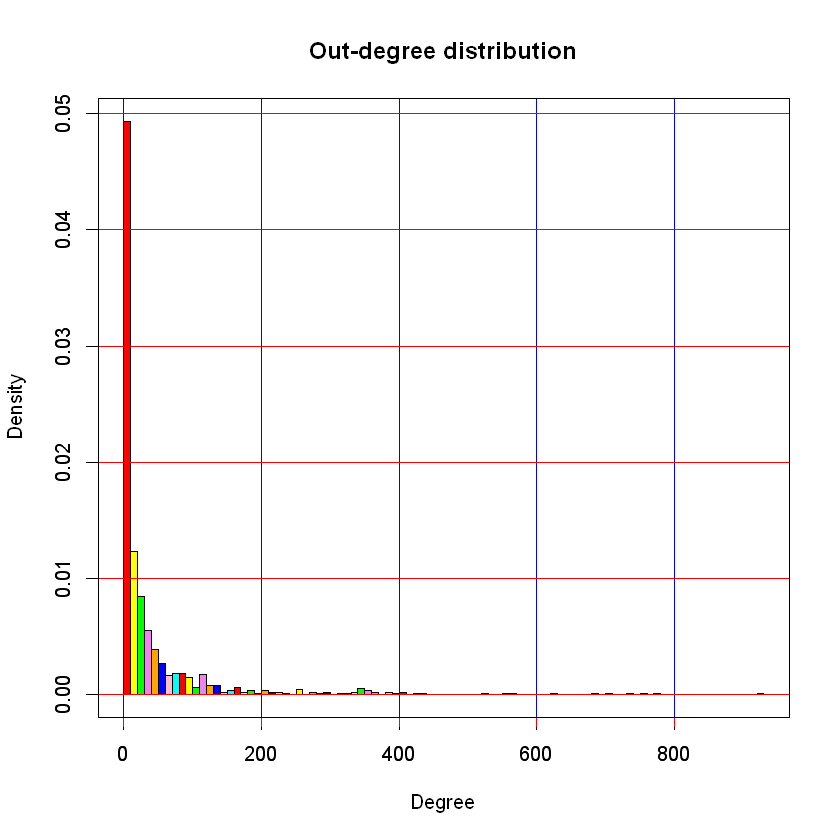

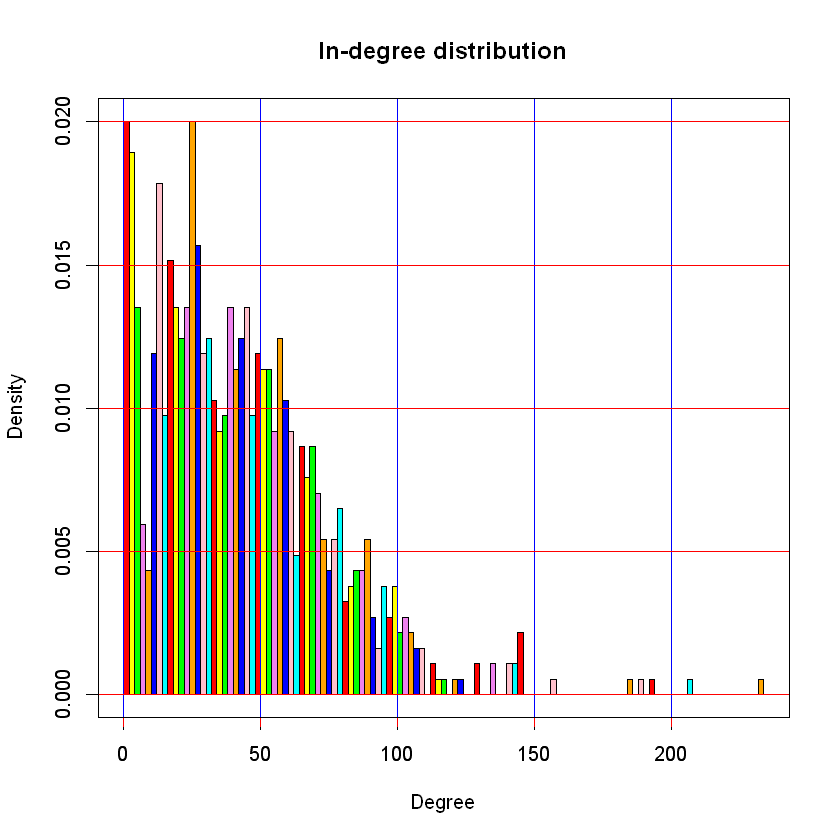


Modularity of the community =  0.319472551345825[1] 8.895461
[1] "H(C) 8.46514668159249"
[1] "H(K) 1.08119096358335"
[1] "H(C|K) 4.63982898243534"
[1] "H(K|C) 4.78314811509253"

 Score for Homogeneity =  0.451890303032235
 Score for Completeness =  -3.4239623491117

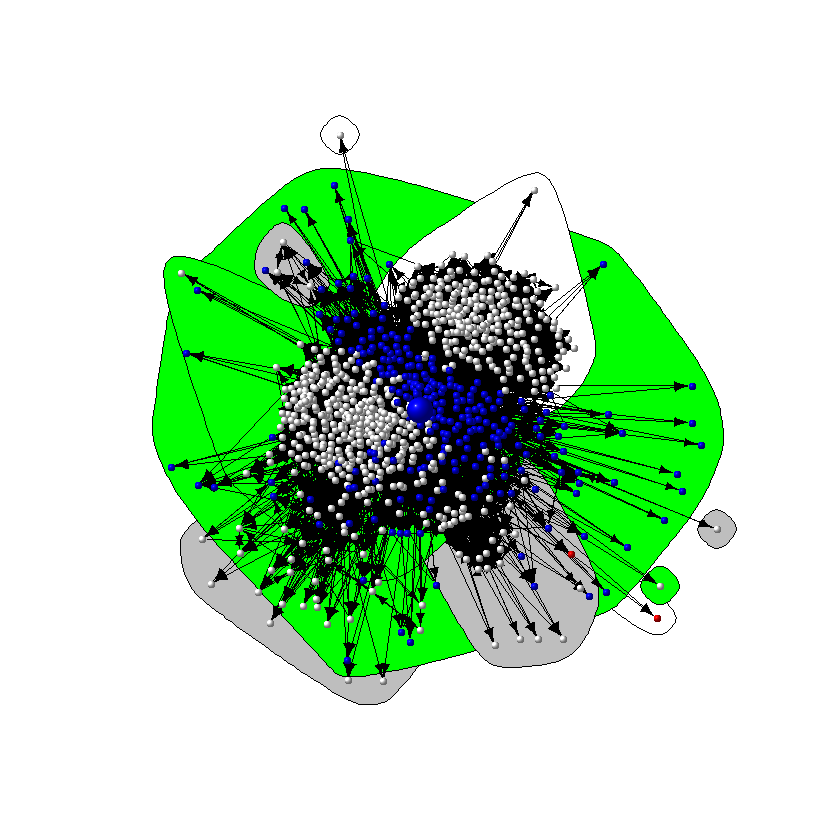

In [103]:
#This answers the last question 22. Pass the 3 nodes...
node_ids <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")


#The code calculates the circles based on the node id
fn1 = function(node_id)
{
    
    circle_lines <- readLines(paste(dir, node_id, ".circles", sep = "")) 
    circles <- list()
    for(circle_nodes in circle_lines)
    {
        list_of_nodes <- strsplit(circle_nodes, '\t')[[1]]
        circles[[list_of_nodes[1]]] <- list_of_nodes[2:(length(list_of_nodes))] 
    }
    
    return(circles)
}

fn2 = function(circomm, N, cinfo = NULL)
{
    entropy <- 0
    meas <- 0
    for(comp in circomm)
    {
            if(is.null(cinfo))
                complength <- length(comp) / N
            else
                complength <- length(intersect(comp, cinfo)) / N
         meas <- meas + complength
            if(complength > 0)
                entropy <- entropy + (complength) * log(complength)
     }  
    if (is.null(cinfo))
        print(meas)
    return(-entropy)
    
}

fn3 = function(circles, communities, N, cinfo)
{
        
    condetropy <- 0
     for(circ in circles)
    {
        
        for(comm in communities)
	{
                       
            cpup <- length(intersect(circ, comm))
            
            if(cpup > 0)
                condetropy <- condetropy + (cpup / N) * log(cpup / length(circ))
           
        }        
    }
    
    return(-condetropy)
}

fn4 = function(circles, communities, N, cinfo){
    condetropy <- 0
    
    for(comm in communities)
    {
        
        for(circ in circles){
                      
            cpup <- length(intersect(circ, comm))
            
            if(cpup > 0)
                condetropy <- condetropy +
                                      (cpup / N) * log(cpup / length(intersect(comm, cinfo)))
           
        }        
    }
    
    return(-condetropy)
}

entropy = function(node_id, community)
{
    
    C <- fn1(node_id)
    ccs <- unique(unlist(C))
    N <- length(ccs )
    K <- communities(community)

#calculate the circle entropy
    cent <- fn2(C, N)
    print(paste('H(C)', cent))
    coment <- fn2(K, N, cinfo = ccs)  
    print(paste('H(K)', coment))

    ck_conditional_entropy <- fn4(C, K, N, cinfo =  ccs)
    print(paste('H(C|K)', ck_conditional_entropy))
    kc_conditional_entropy <- fn3(C, K, N, cinfo = ccs)
    print(paste('H(K|C)', kc_conditional_entropy))
    
    hom_score <- 1 - (ck_conditional_entropy / cent )
    com_score <- 1 - (kc_conditional_entropy / coment)
    
    printf(paste("\n Score for Homogeneity = ", hom_score ))
    printf(paste("\n Score for Completeness = ", com_score ))
    
    return(list(homogeneity = hom_score, completeness = com_score))
    
}

pwn = function(node_id, plot = TRUE)
{
    commnw <- qplot(node_id, plot)
    struc <- qplot2(commnw, node_id, plot)
    output <- entropy(node_id, struc)
   
}

pwn(node_ids[1])
#pwn(node_ids[2])
#pwn(node_ids[3])

 [1] 497 579 601 616 619 628 644 659 660 662 663
The number of users in the list is 11
